In [67]:
import pandas as pd

In [68]:
df=pd.read_csv("Spotify_Playlist.csv")

In [69]:
# artist - Name of artist
# album -  Name of album
# track_name - Name of the song
# track_id - spotify ID for each song
# danceability - Higher the value , easier to dance to the song
# energy - Higher the value , more the energy
# key - The key the track is in
# loudness - higher the value louder the song
# mode - Mode indicates the modality (major or minor) of a track, the type of scale
        # from which its melodic content is derived. Major is represented by 1 and minor is 0.

# speechiness - higher the value , the more spoken word it contains
# instrumentalness - 
# liveness - higher the value the more likely it is a live recording
# valence - higher the value , more positive the song mood
# tempo - beats per minute
# duration_ms - duration of song in milliseconds

In [70]:
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Radio Moscow,Brain Cycles,250 Miles,3drJvEvfMS5mnJ4JtmkM5S,0.467,0.422,9,-11.077,0,0.0703,0.169000,0.0960,0.588,76.818,292000,4
1,Milo Greene,Milo Greene,1957,08cXy6KUizaAelYXtcew3w,0.388,0.595,1,-9.799,1,0.0325,0.000056,0.1780,0.596,190.043,204213,4
2,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,1979 - Remastered 2012,5QLHGv0DfpeXLNFo7SFEy1,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,266200,4
3,Lucifer,Lucifer I,Abracadabra,4tLRIAfjJmTFtro5fPyiAx,0.391,0.670,2,-7.096,1,0.0289,0.750000,0.0563,0.106,134.890,354266,4
4,Cigarettes After Sex,Affection,Affection,4eVNSHRazoHgfYGv3AYFyZ,0.415,0.425,7,-11.232,1,0.0250,0.908000,0.1050,0.248,89.839,311000,4


In [71]:
df.shape

(411, 16)

In [72]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,4.110000e+02,411.000000
mean,0.493628,0.665121,5.209246,-7.753170,0.778589,0.052649,0.143603,0.174205,0.402535,120.773017,2.655939e+05,3.878345
std,0.150861,0.238433,3.457055,3.715933,0.415703,0.042327,0.270342,0.149044,0.242607,30.326114,9.076497e+04,0.424601
min,0.115000,0.003420,0.000000,-30.427000,0.000000,0.023600,0.000000,0.015500,0.032100,53.297000,5.576000e+04,1.000000
25%,0.393000,0.495500,2.000000,-9.771000,1.000000,0.030500,0.000003,0.094600,0.210500,96.564500,2.144400e+05,4.000000
50%,0.506000,0.706000,5.000000,-6.931000,1.000000,0.037700,0.001190,0.116000,0.362000,118.995000,2.473270e+05,4.000000
75%,0.596000,0.865500,8.000000,-5.044000,1.000000,0.055450,0.102500,0.190000,0.564000,142.543000,2.919535e+05,4.000000
max,0.933000,0.998000,11.000000,-1.688000,1.000000,0.340000,0.979000,0.983000,0.975000,204.094000,1.120098e+06,5.000000


In [73]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.057396,0.044054,0.006995,0.089806,-0.194896,-0.191857,-0.100814,0.523270,-0.210881,-0.310001,0.136520
energy,-0.057396,1.000000,0.076178,0.774633,-0.200355,0.363439,-0.024429,0.185776,0.319581,0.160057,0.067133,0.131002
key,0.044054,0.076178,1.000000,0.031416,-0.179830,0.043481,-0.041534,-0.017128,0.077468,-0.003703,0.062088,-0.024156
loudness,0.006995,0.774633,0.031416,1.000000,-0.094931,0.202928,-0.228611,0.135443,0.279017,0.115771,-0.008182,0.206528
mode,0.089806,-0.200355,-0.179830,-0.094931,1.000000,-0.246109,-0.060344,-0.029930,-0.023377,0.000677,-0.117930,-0.083884
speechiness,-0.194896,0.363439,0.043481,0.202928,-0.246109,1.000000,-0.000753,0.122489,-0.071724,0.160530,0.131371,-0.064634
instrumentalness,-0.191857,-0.024429,-0.041534,-0.228611,-0.060344,-0.000753,1.000000,-0.074492,-0.209600,-0.061509,0.362315,-0.088887
liveness,-0.100814,0.185776,-0.017128,0.135443,-0.029930,0.122489,-0.074492,1.000000,-0.000138,0.079605,-0.050579,-0.033840
valence,0.523270,0.319581,0.077468,0.279017,-0.023377,-0.071724,-0.209600,-0.000138,1.000000,0.049567,-0.290116,0.192698
tempo,-0.210881,0.160057,-0.003703,0.115771,0.000677,0.160530,-0.061509,0.079605,0.049567,1.000000,-0.075158,-0.032559


In [74]:
s=df.query('speechiness == 0.34')
s

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
364,Dream Theater,Untethered Angel,Untethered Angel,3z1M3nvvKkchcUr4OjlMLP,0.221,0.944,1,-5.337,1,0.34,0.0164,0.0926,0.248,88.719,374893,4


In [75]:

df.query('liveness > 0.7')

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
54,Still Patient?,Chameleon,Chameleon,3eCIDRQJz1TQMXi38kDLcc,0.355,0.897,1,-6.494,0,0.0853,0.197000,0.891,0.153,149.928,312480,4
165,The Corrs,Talk On Corners,I Never Loved You Anyway,3ySeAH0zT6uTssFVmHZM1T,0.551,0.670,7,-6.588,1,0.0303,0.000000,0.711,0.380,96.938,233560,4
274,The Cure,Disintegration (Deluxe Edition),Pictures of You - Live at Wembley 07/89 - Remi...,7i2wCdelxY5tPXg791Gju0,0.515,0.901,9,-5.558,1,0.0384,0.031700,0.983,0.417,90.296,424467,4
290,Mad Season,Above (Deluxe Edition),River Of Deceit - Live at The Moore,0EuSnlrpdWZzzueqy1Fo0d,0.267,0.533,0,-9.909,1,0.0322,0.002960,0.970,0.409,187.678,310240,4
293,The 1975,"DH00278 (Live from The O2, London. 16.12.16)","Robbers - Live From The O2, London. 16.12.16",1wJIu1gNJTwXHZztdkNncf,0.486,0.776,4,-7.436,1,0.0388,0.000061,0.940,0.331,99.593,243643,4
324,Various Artists,Gothic Rock 3 - Black on Black,Spirit Walker,0NLuyHeITS20TXkA46R4Vn,0.306,0.973,9,-3.891,0,0.0761,0.032500,0.893,0.224,163.990,216467,4
329,Angus & Julia Stone,Spotify Sessions,Stay With Me - Live From Spotify Berlin,6itWAD2WxmAVQgWuk85yXx,0.614,0.106,0,-22.097,1,0.0413,0.050900,0.708,0.169,75.890,174373,4
388,A Place To Bury Strangers,We've Come so Far,We've Come so Far,1Umv4DK0emQ9kRhFdk9gqy,0.185,0.976,7,-1.688,0,0.0746,0.548000,0.874,0.221,119.940,307533,3


In [76]:
df["valence"].max()
df.query('valence > 0.9')

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,1979 - Remastered 2012,5QLHGv0DfpeXLNFo7SFEy1,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,266200,4
8,Cage The Elephant,Cage The Elephant,Ain't No Rest for the Wicked,3kb72STxc2959ZqsTwu52i,0.634,0.849,0,-7.075,1,0.1050,0.000000,0.3630,0.919,156.004,175493,4
18,She Past Away,Narin Yalnızlık,Asimilasyon,3A6pYIUJ7jspDJdab9pCPo,0.575,0.899,2,-4.328,1,0.0473,0.865000,0.0805,0.905,159.993,252094,4
29,Jesse McCartney,Beautiful Soul,Beautiful Soul,2qXKFmKjFzhSGG7kPzoK8n,0.651,0.662,9,-4.340,1,0.0469,0.000000,0.0267,0.933,89.979,214227,4
32,Matt Nathanson,Sings His Sad Heart,Best Drugs,204OOAOnmbBayjheR5PTPj,0.735,0.802,0,-3.933,1,0.0458,0.000000,0.0526,0.961,98.992,184000,4
101,Various Artists,Assassin's Creed 4: Black Flag (Sea Shanty Edi...,Drunken Sailor,0mGVZddgCy1jYBnWvKCV8H,0.689,0.283,5,-6.011,1,0.0387,0.000000,0.1160,0.970,160.241,89520,4
126,The Aggrolites,The Aggrolites,Funky Fire,23ocdrkMsbIT8Y5zYYFGLR,0.813,0.825,0,-5.564,1,0.0685,0.683000,0.0528,0.964,123.340,250987,4
168,Ramones,Road to Ruin (Expanded 2005 Remaster),I Wanna Be Sedated - 2002 Remaster,6vvmYYUvGXtZLU8msxKvzF,0.597,0.960,11,-3.989,1,0.0420,0.000029,0.1050,0.937,163.017,149467,4
192,Boy George,At Worst...The Best Of Boy George And Culture ...,Karma Chameleon,48O0GrGJWml3DzHhC5sJ7a,0.676,0.577,10,-12.031,1,0.0365,0.000000,0.1480,0.934,91.980,241600,4
219,Joy Division,Substance,Love Will Tear Us Apart - 2010 Remaster,1r8oPEXqnhUVgkUkJNqEuF,0.525,0.902,2,-8.662,1,0.0368,0.691000,0.1370,0.907,146.830,204621,4


In [77]:
df.query('duration_ms > 500000')

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
43,Dream Theater,A Dramatic Turn of Events,Bridges in the Sky,2eBHUYKjKhcFwSNmPkZday,0.524,0.944,7,-6.697,1,0.0911,0.00668,0.1090,0.1200,108.785,661427,3
130,Letters From The Colony,Vignette,Galax,1dITa0REcdL0R7UM2mjPzm,0.261,0.862,7,-7.050,1,0.0546,0.51500,0.3570,0.1330,109.977,500001,4
136,Clouds Taste Satanic,The Glitter of Infinite Hell,Greed,3dQ2yEspbVq19i5bq2PAeZ,0.262,0.525,7,-9.601,1,0.0392,0.90200,0.1110,0.0695,107.621,1120098,4
223,Low,I Could Live In Hope,Lullaby,1De66xUavye2fNqhCwtgyo,0.372,0.232,11,-14.246,0,0.0423,0.62900,0.1120,0.0924,125.798,589107,4
228,Metallica,Master of Puppets (Remastered Deluxe Box Set),Master of Puppets (Remastered),54bm2e3tk8cliUz3VSdCPZ,0.539,0.828,4,-9.108,0,0.0350,0.42100,0.1540,0.5620,105.250,515387,4
240,Immortal,Mighty Ravendark,Mighty Ravendark,69ANeIfCzbOonHEOQtLr8n,0.164,0.993,4,-5.581,0,0.0944,0.63100,0.0946,0.0474,104.987,554863,4
258,Son of a Witch,Thrones in the Sky,New Monster,77j9pklA25tPrcUJwQrJcZ,0.184,0.906,5,-7.257,0,0.0900,0.02820,0.1210,0.5100,174.299,608613,4
301,Firtan,Seegang,Seegang,0yD43guef0ewRLGHG33Vcc,0.271,0.941,1,-7.496,0,0.0985,0.07540,0.1770,0.1090,144.946,516535,4
361,Death Angel,The Ultra-Violence,The Ultra-Violence,20bJTQOaoHqeCHBhqIgcTl,0.238,0.990,4,-3.725,0,0.2260,0.69200,0.1530,0.1940,109.438,633600,4
373,1000mods,Super Van Vacation,Vidage,0GHRVjxxKDpFBHKMfoTiQ2,0.416,0.722,5,-7.746,1,0.0379,0.78900,0.1380,0.3050,119.018,528111,4


In [78]:
df["duration_ms"]=(df["duration_ms"]/(1000*60))%60  #Convert to minutes

In [79]:
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Radio Moscow,Brain Cycles,250 Miles,3drJvEvfMS5mnJ4JtmkM5S,0.467,0.422,9,-11.077,0,0.0703,0.169000,0.0960,0.588,76.818,4.866667,4
1,Milo Greene,Milo Greene,1957,08cXy6KUizaAelYXtcew3w,0.388,0.595,1,-9.799,1,0.0325,0.000056,0.1780,0.596,190.043,3.403550,4
2,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,1979 - Remastered 2012,5QLHGv0DfpeXLNFo7SFEy1,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,4.436667,4
3,Lucifer,Lucifer I,Abracadabra,4tLRIAfjJmTFtro5fPyiAx,0.391,0.670,2,-7.096,1,0.0289,0.750000,0.0563,0.106,134.890,5.904433,4
4,Cigarettes After Sex,Affection,Affection,4eVNSHRazoHgfYGv3AYFyZ,0.415,0.425,7,-11.232,1,0.0250,0.908000,0.1050,0.248,89.839,5.183333,4


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [81]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.057396,0.044054,0.006995,0.089806,-0.194896,-0.191857,-0.100814,0.523270,-0.210881,-0.310001,0.136520
energy,-0.057396,1.000000,0.076178,0.774633,-0.200355,0.363439,-0.024429,0.185776,0.319581,0.160057,0.067133,0.131002
key,0.044054,0.076178,1.000000,0.031416,-0.179830,0.043481,-0.041534,-0.017128,0.077468,-0.003703,0.062088,-0.024156
loudness,0.006995,0.774633,0.031416,1.000000,-0.094931,0.202928,-0.228611,0.135443,0.279017,0.115771,-0.008182,0.206528
mode,0.089806,-0.200355,-0.179830,-0.094931,1.000000,-0.246109,-0.060344,-0.029930,-0.023377,0.000677,-0.117930,-0.083884
speechiness,-0.194896,0.363439,0.043481,0.202928,-0.246109,1.000000,-0.000753,0.122489,-0.071724,0.160530,0.131371,-0.064634
instrumentalness,-0.191857,-0.024429,-0.041534,-0.228611,-0.060344,-0.000753,1.000000,-0.074492,-0.209600,-0.061509,0.362315,-0.088887
liveness,-0.100814,0.185776,-0.017128,0.135443,-0.029930,0.122489,-0.074492,1.000000,-0.000138,0.079605,-0.050579,-0.033840
valence,0.523270,0.319581,0.077468,0.279017,-0.023377,-0.071724,-0.209600,-0.000138,1.000000,0.049567,-0.290116,0.192698
tempo,-0.210881,0.160057,-0.003703,0.115771,0.000677,0.160530,-0.061509,0.079605,0.049567,1.000000,-0.075158,-0.032559


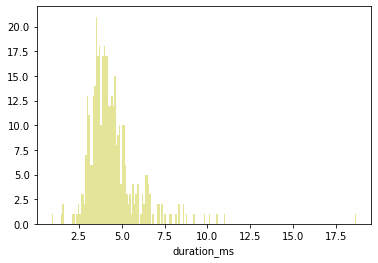

In [112]:
sns.distplot(df["duration_ms"] , bins=200 ,kde=False ,color="y")